<a href="https://colab.research.google.com/github/Melisacid/Act_6.2/blob/main/Actividad_6_2_espa%C3%B1a_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv("data_clean_girona_espana.csv")
df.head()

,Unnamed: 0,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
0,0,14551,20230300000000.0,57237.0,1.0,5.0,41.9965,2.83646,2.0,1.0,...,Private room,1 private bath,"[""Shared pool"", ""Refrigerator"", ""Long term sta...",42.0,t,31/03/2023,08/10/2010,27/02/2023,HUTG-049542,f
1,1,1205757,20230300000000.0,6586355.0,1.0,1.0,41.79304,2.77412,2.0,1.0,...,Private room,1.5 shared baths,"[""Free parking on premises"", ""Refrigerator"", ""...",47.0,t,31/03/2023,01/08/2013,26/06/2022,HUTG-049542,f
2,2,1212820,20230300000000.0,6620645.0,2.0,3.0,42.11284,3.1667,4.0,1.0,...,Entire home/apt,1 bath,"[""Air conditioning"", ""Free parking on premises...",74.0,t,01/04/2023,10/06/2013,30/12/2022,HUTG-049542,f
3,3,751638,20230300000000.0,3680160.0,6.0,6.0,42.36958,2.9803,2.0,1.0,...,Private room,1 private bath,"[""Hair dryer"", ""Luggage dropoff allowed"", ""Fre...",45.0,t,31/03/2023,23/08/2013,29/08/2022,PG000794,t
4,4,41342,20230300000000.0,180072.0,2.0,3.0,42.34655,3.20463,4.0,1.0,...,Entire home/apt,1 bath,"[""Free parking on premises"", ""Refrigerator"", ""...",120.0,t,01/04/2023,14/07/2013,28/08/2021,HUTG-003688,f


In [ ]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=df.isnull().sum().sum()
valores_nulos

72

In [65]:
#No se porque sale que hay nulos si en el archivo del pais dice que hay 0 nulos
#para que no haya errores todos los nulos los reemplazo con bfill
df.fillna(method='bfill', inplace=True)

In [66]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=df.isnull().sum().sum()
valores_nulos

0

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5461 entries, 0 to 5460
Data columns (total 73 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    5461 non-null   object 
 1   id                                            5461 non-null   object 
 2   scrape_id                                     5461 non-null   object 
 3   host_id                                       5461 non-null   float64
 4   host_listings_count                           5461 non-null   object 
 5   host_total_listings_count                     5461 non-null   object 
 6   latitude                                      5461 non-null   object 
 7   longitude                                     5461 non-null   object 
 8   accommodates                                  5461 non-null   object 
 9   bedrooms                                      5461 non-null   o

## Analizar la correlación que existe en cada tipo de habitación (Elegir 2 tipos) respecto a las variables siguientes en el siguiente orden “(dependiente, independiente)”

# **Tipo de habitación 1: Private room.**

## **1.“host_acceptance_rate vs host_response_rate, Price, number_of_reviews , review_scores_rating”**

In [68]:
# Filtrar los datos para obtener solo los tipos de habitación "Entire home/apt" y "Hotel room"
private_room = df[df['room_type'] == 'Private room']

In [ ]:
#Cambiar datos
private_room['host_response_rate'] = private_room['host_response_rate'].astype(str)  
private_room['host_response_rate'] = private_room['host_response_rate'].str.replace('%', '')  
private_room['host_response_rate'] = pd.to_numeric(private_room['host_response_rate'], errors='coerce')  
private_room[['host_acceptance_rate',"host_response_rate"]] = private_room[['host_acceptance_rate',"host_response_rate"]].replace('%', '', regex=True).astype('float') / 100

<Axes: xlabel='host_acceptance_rate', ylabel='host_response_rate'>

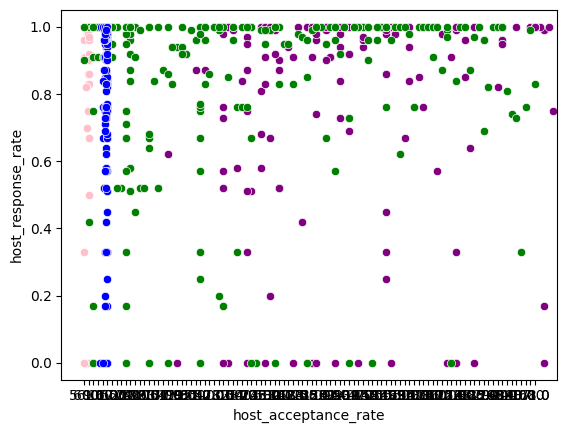

In [70]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='host_acceptance_rate', y='host_response_rate',color="pink",data=private_room)
sns.scatterplot(x='price', y='host_acceptance_rate', color="purple", data=private_room)
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="green", data=private_room)
sns.scatterplot(x='review_scores_rating', y='host_acceptance_rate', color="blue", data=private_room)

In [71]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= private_room[['host_response_rate', 'price','number_of_reviews',"review_scores_rating"]]
Var_Dep= private_room['host_acceptance_rate']

In [72]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [73]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [74]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [75]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate', 'price', 'number_of_reviews',
        'review_scores_rating'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([5.16683218e-01, 9.24140637e-05, 6.83246739e-04, 1.28917411e-01]),
 'rank_': 4,
 'singular_': array([2244.19650944,  717.06768019,    3.98713788,    3.42172096]),
 'intercept_': -0.3059202825078464}

**Modelo matemático: y= 1.97911016e-01x1 + -2.52257605e-08x2 + 1.78771577e-04x3 + -1.48484267e-02x4 + 90.14555660858437**

In [76]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.18871056150761956

In [77]:
#Predecimos los valores de total 
y_pred= model.predict(X=private_room[['host_response_rate', 'price','number_of_reviews',"review_scores_rating"]])
y_pred

array([0.87428806, 0.87490477, 0.85018775, 0.81514378, 0.82908842,
       0.82180467, 0.79820462, 0.88871912, 0.890093  , 0.77473508,
       0.80290511, 0.84096749, 0.8509015 , 0.75123361, 0.75007351,
       0.81219369, 0.84316694, 0.88929639, 0.73367559, 0.83368065,
       0.82181039, 0.37343075, 0.79735451, 0.90739349, 0.83285817,
       0.82632451, 0.83792708, 0.86941356, 0.83432755, 0.86839267,
       0.82457326, 0.83973944, 0.89121213, 0.81517305, 0.7582519 ,
       0.8716443 , 0.89595974, 0.28150878, 0.2770729 , 0.81353273,
       0.8703377 , 0.81353273, 0.74005379, 0.7648737 , 0.33597415,
       0.86868705, 0.86298061, 0.33870682, 0.86288808, 0.85828124,
       0.85687053, 0.27744256, 0.88374354, 0.81142073, 0.83413145,
       0.81605745, 0.8630567 , 0.78472205, 0.81380009, 0.80170373,
       0.80382925, 0.86781171, 0.87760543, 0.74144   , 0.84908527,
       0.83492747, 0.86113221, 0.88021642, 0.84979764, 0.82400598,
       0.83740538, 0.86873031, 0.85099639, 0.85477413, 0.90708

In [78]:
#Insertamos la columna de predicciones en el DataFrame
private_room.insert(0, 'Predicciones', y_pred)
private_room.head()

,Predicciones,Unnamed: 0,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
0,0.874288,0,14551,20230300000000.0,57237.0,1.0,5.0,41.9965,2.83646,2.0,...,Private room,1 private bath,"[""Shared pool"", ""Refrigerator"", ""Long term sta...",42.0,t,31/03/2023,08/10/2010,27/02/2023,HUTG-049542,f
1,0.874905,1,1205757,20230300000000.0,6586355.0,1.0,1.0,41.79304,2.77412,2.0,...,Private room,1.5 shared baths,"[""Free parking on premises"", ""Refrigerator"", ""...",47.0,t,31/03/2023,01/08/2013,26/06/2022,HUTG-049542,f
3,0.850188,3,751638,20230300000000.0,3680160.0,6.0,6.0,42.36958,2.9803,2.0,...,Private room,1 private bath,"[""Hair dryer"", ""Luggage dropoff allowed"", ""Fre...",45.0,t,31/03/2023,23/08/2013,29/08/2022,PG000794,t
12,0.815144,12,755927,20230300000000.0,3680160.0,6.0,6.0,42.36958,2.9803,3.0,...,Private room,1 private bath,"[""Hair dryer"", ""Luggage dropoff allowed"", ""Was...",49.0,t,31/03/2023,05/08/2013,08/09/2022,PG000794,t
13,0.829088,13,756145,20230300000000.0,3680160.0,6.0,6.0,42.36958,2.9803,3.0,...,Private room,1 private bath,"[""Hair dryer"", ""Dedicated workspace"", ""Luggage...",53.0,t,31/03/2023,18/08/2013,07/08/2018,PG000794,t


<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

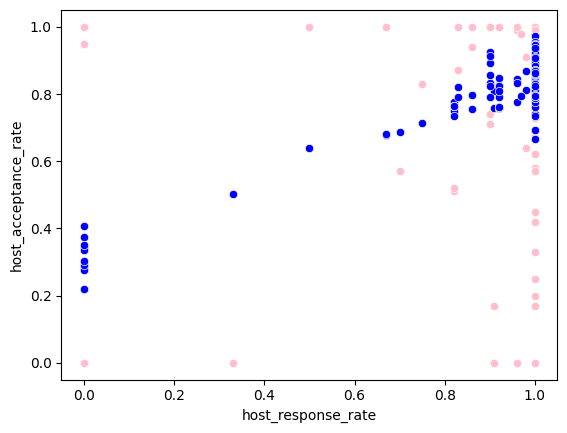

In [79]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="pink", data=private_room)
sns.scatterplot(x='host_response_rate', y='Predicciones', color="blue", data=private_room)

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

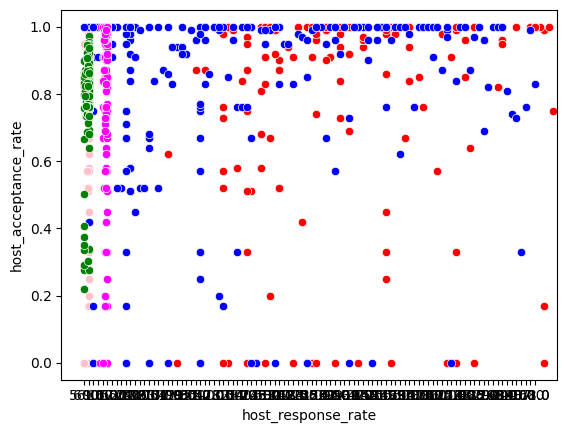

In [80]:
sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="pink", data=private_room)
sns.scatterplot(x='price', y='host_acceptance_rate', color="red", data=private_room)
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=private_room)
sns.scatterplot(x='review_scores_rating', y='host_acceptance_rate', color="magenta", data=private_room)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones', color="green", data=private_room)

In [81]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.18871056150761956
Coeficiente de correlación:  0.43440828894902495


## **2.“Price” vs availability_365, host_response_rate, number_of_reviews, accommodates“**

<Axes: xlabel='availability_365', ylabel='price'>

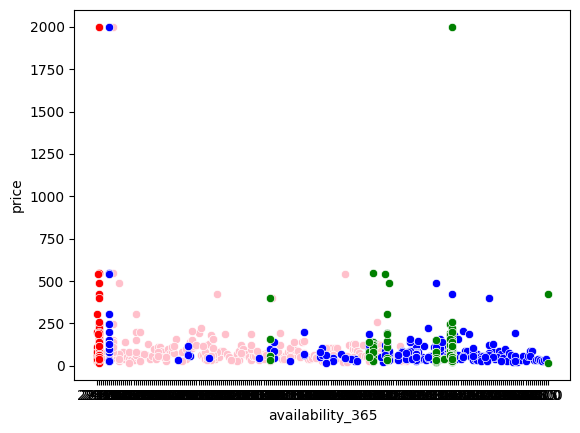

In [82]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='availability_365', y='price', color="pink", data=private_room)
sns.scatterplot(x='host_response_rate', y='price', color="red", data=private_room)
sns.scatterplot(x='number_of_reviews', y='price', color="blue", data=private_room)
sns.scatterplot(x='accommodates', y='price', color="green", data=private_room)

In [83]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= private_room[['availability_365', 'host_response_rate','number_of_reviews',"accommodates"]]
Var_Dep= private_room['price']

In [84]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [85]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [86]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [87]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['availability_365', 'host_response_rate', 'number_of_reviews',
        'accommodates'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([ 0.1800815 ,  8.03327917, -0.63885689,  8.64212977]),
 'rank_': 4,
 'singular_': array([2021.45987494,  735.45376139,   30.20825988,    3.5814695 ]),
 'intercept_': 48.81940678406737}

**Modelo matemático: y= -1.44748703x1 + 568.22965627x2+ -13.41899636x3 + 32.5337422x4 + 1456.3609884316134**

In [88]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.08896595008082009

In [89]:
#Predecimos los valores de total 
y_pred= model.predict(X=private_room[['availability_365', 'host_response_rate','number_of_reviews',"accommodates"]])
y_pred

array([ 91.12483793,  86.58851394, 113.04744431, 120.8706357 ,
       120.23177881, 123.06590025, 124.14035979,  38.99981674,
        35.80553231, 146.01819433, 139.86669122, 142.0489951 ,
       120.75666199,  70.38202407, 156.37280353, 132.20514663,
       108.01893851,  88.27357318, 174.40659123, 102.61827566,
        16.22191175,  86.29449161,  95.55266602,  80.76681828,
        98.11267428, 107.29861253, 115.04211682, 135.06881664,
       117.02301327,  94.78654618, 117.02123127, 111.47931874,
        26.49287802, 131.71736189, 139.1436961 ,  92.35184843,
        81.24189999, 127.86627316, 113.28680005, 157.15095076,
       146.59225033, 157.15095076, 139.22783434, 130.54963596,
       123.52827252, 106.21812356, 121.49675026, 116.80271342,
       137.18857673, 121.16488766, 132.69347059,  81.05043042,
        75.42786222, 109.32224726,  69.0260904 , 121.57560037,
       125.5416407 , 110.37804306,  85.56354878,  95.38477992,
       121.85497771, 101.54377292, 102.6585485 , 125.18

In [90]:
#Insertamos la columna de predicciones en el DataFrame
private_room.insert(0, 'Predicciones2', y_pred)
private_room.head()

,Predicciones2,Predicciones,Unnamed: 0,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
0,91.124838,0.874288,0,14551,20230300000000.0,57237.0,1.0,5.0,41.9965,2.83646,...,Private room,1 private bath,"[""Shared pool"", ""Refrigerator"", ""Long term sta...",42.0,t,31/03/2023,08/10/2010,27/02/2023,HUTG-049542,f
1,86.588514,0.874905,1,1205757,20230300000000.0,6586355.0,1.0,1.0,41.79304,2.77412,...,Private room,1.5 shared baths,"[""Free parking on premises"", ""Refrigerator"", ""...",47.0,t,31/03/2023,01/08/2013,26/06/2022,HUTG-049542,f
3,113.047444,0.850188,3,751638,20230300000000.0,3680160.0,6.0,6.0,42.36958,2.9803,...,Private room,1 private bath,"[""Hair dryer"", ""Luggage dropoff allowed"", ""Fre...",45.0,t,31/03/2023,23/08/2013,29/08/2022,PG000794,t
12,120.870636,0.815144,12,755927,20230300000000.0,3680160.0,6.0,6.0,42.36958,2.9803,...,Private room,1 private bath,"[""Hair dryer"", ""Luggage dropoff allowed"", ""Was...",49.0,t,31/03/2023,05/08/2013,08/09/2022,PG000794,t
13,120.231779,0.829088,13,756145,20230300000000.0,3680160.0,6.0,6.0,42.36958,2.9803,...,Private room,1 private bath,"[""Hair dryer"", ""Dedicated workspace"", ""Luggage...",53.0,t,31/03/2023,18/08/2013,07/08/2018,PG000794,t


<Axes: xlabel='availability_365', ylabel='price'>

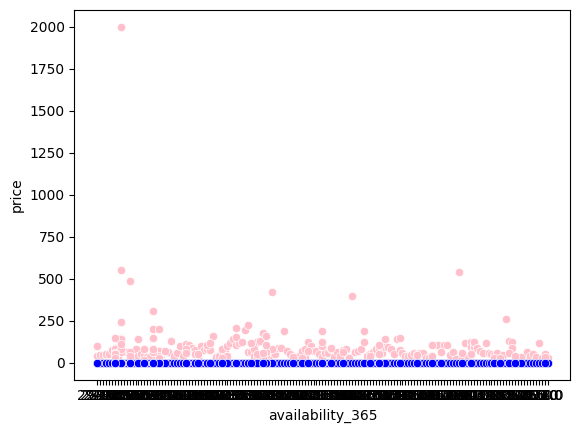

In [91]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='availability_365', y='price', color="pink", data=private_room)
sns.scatterplot(x='availability_365', y='Predicciones', color="blue", data=private_room)

<Axes: xlabel='availability_365', ylabel='price'>

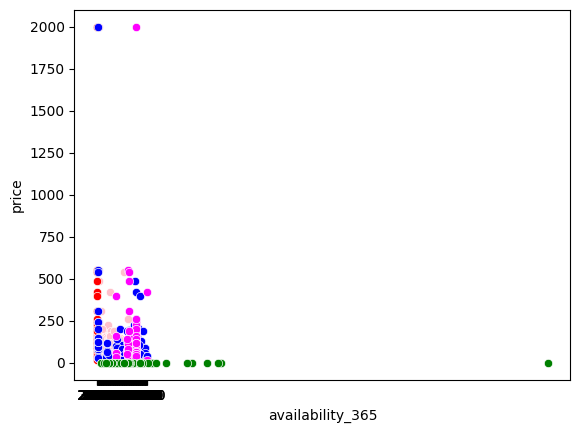

In [92]:
sns.scatterplot(x='availability_365', y='price', color="pink", data=private_room)
sns.scatterplot(x='host_response_rate', y='price', color="red", data=private_room)
sns.scatterplot(x='number_of_reviews', y='price', color="blue", data=private_room)
sns.scatterplot(x='accommodates', y='price', color="magenta", data=private_room)
sns.scatterplot(x='price', y='Predicciones', color="green", data=private_room)

In [93]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.08896595008082009
Coeficiente de correlación:  0.29827160454998075


## **3. “host_acceptance_rate vs number_of_reviews,review_scores_cleanliness,review_scores_communication ”**

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

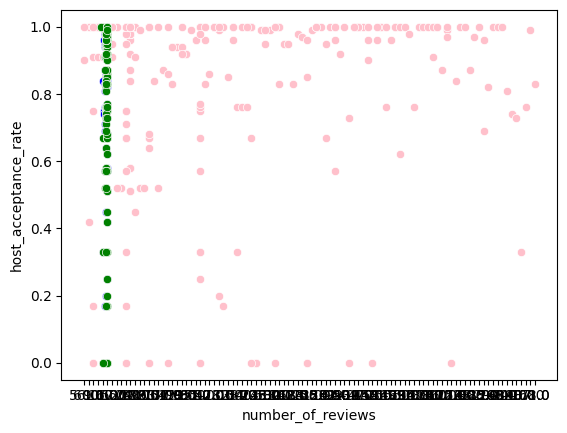

In [94]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="pink", data=private_room)
sns.scatterplot(x='review_scores_cleanliness', y='host_acceptance_rate', color="blue", data=private_room)
sns.scatterplot(x='review_scores_communication', y='host_acceptance_rate', color="green", data=private_room)

In [95]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= private_room[['number_of_reviews', 'review_scores_cleanliness','review_scores_communication']]
Var_Dep= private_room['host_acceptance_rate']

In [96]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [97]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [98]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [99]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews', 'review_scores_cleanliness',
        'review_scores_communication'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([0.000875  , 0.00572731, 0.08646767]),
 'rank_': 3,
 'singular_': array([736.28398159,   3.85893467,   2.48509019]),
 'intercept_': 0.3368925049531132}

**Modelo matemático: y= 0.0002161x1 + -0.00433818x2 + -0.00180715x3 + 0.9933496363257538**

In [100]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.023528024489303467

In [101]:
#Predecimos los valores de total 
y_pred= model.predict(X=private_room[['number_of_reviews', 'review_scores_cleanliness','review_scores_communication']])
y_pred

array([0.83874163, 0.84172617, 0.80287872, 0.80375372, 0.78935091,
       0.78841788, 0.79580364, 0.8405752 , 0.84316915, 0.87019259,
       0.76963616, 0.8022126 , 0.8079251 , 0.84844813, 0.85660475,
       0.77006804, 0.80088974, 0.83639168, 0.82955202, 0.80394754,
       0.90351216, 0.84299076, 0.83498157, 0.88563748, 0.80141636,
       0.7970357 , 0.80106714, 0.80049238, 0.80527598, 0.84511628,
       0.79698401, 0.81333885, 0.86700159, 0.79128779, 0.76963616,
       0.81195314, 0.86094985, 0.76963616, 0.76963616, 0.76963616,
       0.80049238, 0.76963616, 0.71227472, 0.7469254 , 0.80838328,
       0.81674029, 0.82823215, 0.80547192, 0.81132313, 0.8125943 ,
       0.80399238, 0.76963616, 0.86199659, 0.80763299, 0.79380398,
       0.78358928, 0.79874238, 0.76058183, 0.77051116, 0.76963616,
       0.76963616, 0.8160798 , 0.81931982, 0.79874238, 0.7848502 ,
       0.80214374, 0.81040118, 0.85014285, 0.80280207, 0.80049238,
       0.77831864, 0.79961738, 0.8134558 , 0.81085937, 0.89409

In [102]:
#Insertamos la columna de predicciones en el DataFrame
private_room.insert(0, 'Predicciones3', y_pred)
private_room.head()

,Predicciones3,Predicciones2,Predicciones,Unnamed: 0,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
0,0.838742,91.124838,0.874288,0,14551,20230300000000.0,57237.0,1.0,5.0,41.9965,...,Private room,1 private bath,"[""Shared pool"", ""Refrigerator"", ""Long term sta...",42.0,t,31/03/2023,08/10/2010,27/02/2023,HUTG-049542,f
1,0.841726,86.588514,0.874905,1,1205757,20230300000000.0,6586355.0,1.0,1.0,41.79304,...,Private room,1.5 shared baths,"[""Free parking on premises"", ""Refrigerator"", ""...",47.0,t,31/03/2023,01/08/2013,26/06/2022,HUTG-049542,f
3,0.802879,113.047444,0.850188,3,751638,20230300000000.0,3680160.0,6.0,6.0,42.36958,...,Private room,1 private bath,"[""Hair dryer"", ""Luggage dropoff allowed"", ""Fre...",45.0,t,31/03/2023,23/08/2013,29/08/2022,PG000794,t
12,0.803754,120.870636,0.815144,12,755927,20230300000000.0,3680160.0,6.0,6.0,42.36958,...,Private room,1 private bath,"[""Hair dryer"", ""Luggage dropoff allowed"", ""Was...",49.0,t,31/03/2023,05/08/2013,08/09/2022,PG000794,t
13,0.789351,120.231779,0.829088,13,756145,20230300000000.0,3680160.0,6.0,6.0,42.36958,...,Private room,1 private bath,"[""Hair dryer"", ""Dedicated workspace"", ""Luggage...",53.0,t,31/03/2023,18/08/2013,07/08/2018,PG000794,t


<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

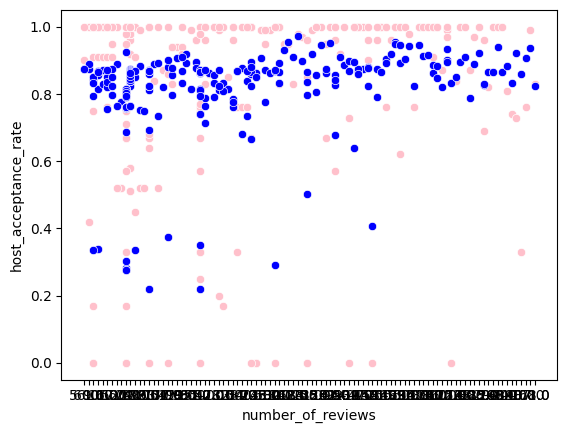

In [103]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="pink", data=private_room)
sns.scatterplot(x='number_of_reviews', y='Predicciones', color="blue", data=private_room)

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

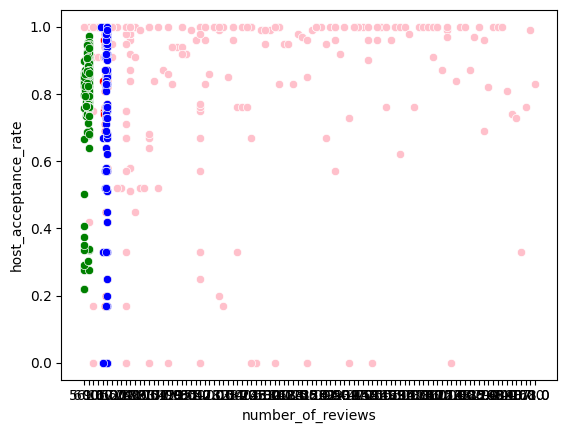

In [104]:
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="pink", data=private_room)
sns.scatterplot(x='review_scores_cleanliness', y='host_acceptance_rate', color="red", data=private_room)
sns.scatterplot(x='review_scores_communication', y='host_acceptance_rate', color="blue", data=private_room)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones', color="green", data=private_room)

In [105]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.023528024489303467
Coeficiente de correlación:  0.1533884757382492


# **Tipo de habitación 2: Entire home/apt.**

In [106]:
df= pd.read_csv("data_clean_girona_espana.csv")
df.head()

,Unnamed: 0,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
0,0,14551,20230300000000.0,57237.0,1.0,5.0,41.9965,2.83646,2.0,1.0,...,Private room,1 private bath,"[""Shared pool"", ""Refrigerator"", ""Long term sta...",42.0,t,31/03/2023,08/10/2010,27/02/2023,HUTG-049542,f
1,1,1205757,20230300000000.0,6586355.0,1.0,1.0,41.79304,2.77412,2.0,1.0,...,Private room,1.5 shared baths,"[""Free parking on premises"", ""Refrigerator"", ""...",47.0,t,31/03/2023,01/08/2013,26/06/2022,HUTG-049542,f
2,2,1212820,20230300000000.0,6620645.0,2.0,3.0,42.11284,3.1667,4.0,1.0,...,Entire home/apt,1 bath,"[""Air conditioning"", ""Free parking on premises...",74.0,t,01/04/2023,10/06/2013,30/12/2022,HUTG-049542,f
3,3,751638,20230300000000.0,3680160.0,6.0,6.0,42.36958,2.9803,2.0,1.0,...,Private room,1 private bath,"[""Hair dryer"", ""Luggage dropoff allowed"", ""Fre...",45.0,t,31/03/2023,23/08/2013,29/08/2022,PG000794,t
4,4,41342,20230300000000.0,180072.0,2.0,3.0,42.34655,3.20463,4.0,1.0,...,Entire home/apt,1 bath,"[""Free parking on premises"", ""Refrigerator"", ""...",120.0,t,01/04/2023,14/07/2013,28/08/2021,HUTG-003688,f


In [107]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=df.isnull().sum().sum()
valores_nulos

72

In [108]:
#No se porque sale que hay nulos si en el archivo del pais dice que hay 0 nulos
#para que no haya errores todos los nulos los reemplazo con bfill
df.fillna(method='bfill', inplace=True)

In [109]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=df.isnull().sum().sum()
valores_nulos

0

# **1.host_acceptance_rate vs host_response_rate**

In [110]:
enthome_apt = df[df['room_type'] == 'Entire home/apt']

In [ ]:
#Cambiar datos
enthome_apt['host_response_rate'] = enthome_apt['host_response_rate'].astype(str)  
enthome_apt['host_response_rate'] = enthome_apt['host_response_rate'].str.replace('%', '')  
enthome_apt['host_response_rate'] = pd.to_numeric(enthome_apt['host_response_rate'], errors='coerce')
enthome_apt[['host_acceptance_rate',"host_response_rate"]] = enthome_apt[['host_acceptance_rate',"host_response_rate"]].replace('%', '', regex=True).astype('float') / 100

<Axes: xlabel='host_acceptance_rate', ylabel='host_response_rate'>

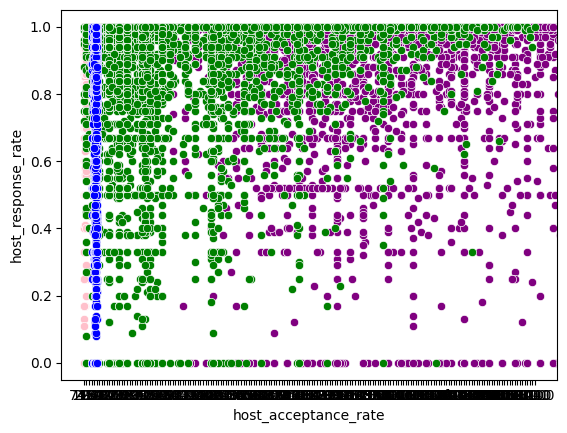

In [112]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='host_acceptance_rate', y='host_response_rate',color="pink",data=enthome_apt)
sns.scatterplot(x='price', y='host_acceptance_rate', color="purple", data=enthome_apt)
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="green", data=enthome_apt)
sns.scatterplot(x='review_scores_rating', y='host_acceptance_rate', color="blue", data=enthome_apt)

In [128]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= enthome_apt[['host_response_rate', 'price','number_of_reviews',"review_scores_rating"]]
Var_Dep= enthome_apt['host_acceptance_rate']

In [129]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [130]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
enthome_apt['host_acceptance_rate'] = pd.to_numeric(enthome_apt['host_acceptance_rate'], errors='coerce')
enthome_apt['host_acceptance_rate'].fillna(0, inplace=True)


In [132]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)


LinearRegression()

In [133]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [134]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate', 'price', 'number_of_reviews',
        'review_scores_rating'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([ 5.00643054e-01,  1.43949407e-04,  6.95829406e-02, -6.33392917e+00]),
 'rank_': 4,
 'singular_': array([4.03845177e+04, 2.34784418e+03, 1.23009114e+03, 2.68531795e+01]),
 'intercept_': 66.16344658462712}

**Modelo matemático: y= 4.17197584e-01x1 + -1.00834090e-08x2 + 1.23100925e-04x3 + -4.88579925e-03x4 + 0.5839431273540848**

In [135]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.15130127032070584

In [136]:
#Predecimos los valores de total 
y_pred= model.predict(X=enthome_apt[['host_response_rate', 'price','number_of_reviews',"review_scores_rating"]])
y_pred

array([93.13821773, 89.39450706, 88.55464413, ..., 86.49918122,
       82.73317906, 84.82066727])

In [137]:
#Insertamos la columna de predicciones en el DataFrame
enthome_apt.insert(0, 'Predicciones', y_pred)
enthome_apt.head()

,Predicciones,Unnamed: 0,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
2,93.138218,2,1212820,20230300000000.0,6620645.0,2.0,3.0,42.11284,3.1667,4.0,...,Entire home/apt,1 bath,"[""Air conditioning"", ""Free parking on premises...",74.0,t,01/04/2023,10/06/2013,30/12/2022,HUTG-049542,f
4,89.394507,4,41342,20230300000000.0,180072.0,2.0,3.0,42.34655,3.20463,4.0,...,Entire home/apt,1 bath,"[""Free parking on premises"", ""Refrigerator"", ""...",120.0,t,01/04/2023,14/07/2013,28/08/2021,HUTG-003688,f
5,88.554644,5,751997,20230300000000.0,3387407.0,12.0,12.0,41.91798,3.16419,4.0,...,Entire home/apt,1 bath,"[""Air conditioning"", ""Pack ’n play/Travel crib...",105.0,t,01/04/2023,03/05/2016,26/02/2023,HUTG-016218,t
6,89.671399,6,752035,20230300000000.0,3387407.0,12.0,12.0,41.91801,3.17085,4.0,...,Entire home/apt,1 bath,"[""Hair dryer"", ""Kitchen"", ""Iron"", ""Air conditi...",110.0,t,31/03/2023,02/07/2013,31/10/2021,HUTG-008974,f
7,90.899769,7,1215790,20230300000000.0,3149645.0,1.0,1.0,41.84984,3.1265,7.0,...,Entire home/apt,2 baths,"[""Hair dryer"", ""Kitchen"", ""Iron"", ""Washer"", ""F...",60.0,t,01/04/2023,01/07/2013,18/02/2018,HUTG-017955,f


<Axes: xlabel='host_acceptance_rate', ylabel='host_response_rate'>

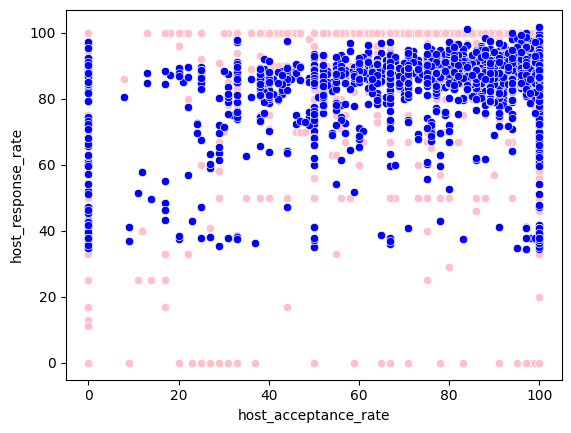

In [138]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='host_acceptance_rate', y='host_response_rate', color="pink", data=enthome_apt)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones', color="blue", data=enthome_apt)

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

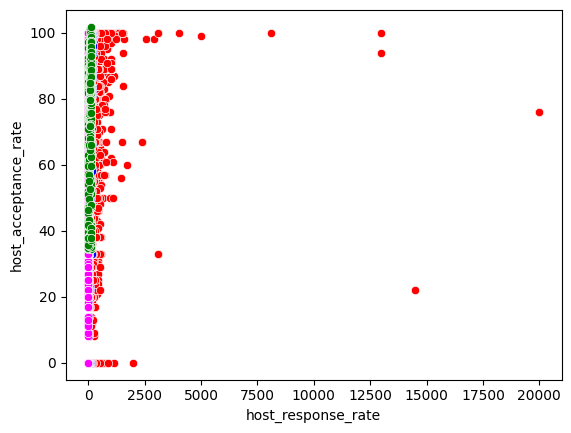

In [139]:
sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="pink", data=enthome_apt)
sns.scatterplot(x='price', y='host_acceptance_rate', color="red", data=enthome_apt)
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=enthome_apt)
sns.scatterplot(x='review_scores_rating', y='host_acceptance_rate', color="magenta", data=enthome_apt)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones', color="green", data=enthome_apt)

In [140]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.15130127032070584
Coeficiente de correlación:  0.38897463968838103


## **2.“Price” vs availability_365, host_response_rate, number_of_reviews, accommodates“**

<Axes: xlabel='availability_365', ylabel='price'>

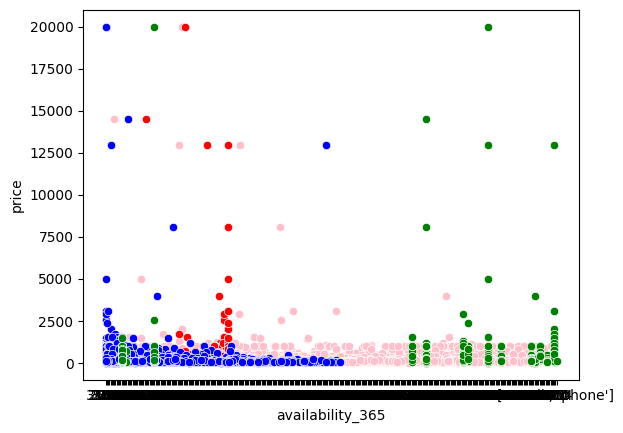

In [141]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='availability_365', y='price', color="pink", data=enthome_apt)
sns.scatterplot(x='host_response_rate', y='price', color="red", data=enthome_apt)
sns.scatterplot(x='number_of_reviews', y='price', color="blue", data=enthome_apt)
sns.scatterplot(x='accommodates', y='price', color="green", data=enthome_apt)

In [151]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= enthome_apt[['availability_365', 'host_response_rate','number_of_reviews',"accommodates"]]
Var_Dep= enthome_apt['price']

In [152]:
Vars_Indep = Vars_Indep.apply(pd.to_numeric, errors='coerce')
Var_Dep = Var_Dep.apply(pd.to_numeric, errors='coerce')
# Llenar los valores NaN con algún valor predeterminado (por ejemplo, 0)
Vars_Indep.fillna(0, inplace=True)
Var_Dep.fillna(0, inplace=True)

# O eliminar las filas con valores NaN
enthome_apt.dropna(subset=['availability_365', 'host_response_rate', 'number_of_reviews', "accommodates", 'price'], inplace=True)


<ipython-input-152-4e71c75db93b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enthome_apt.dropna(subset=['availability_365', 'host_response_rate', 'number_of_reviews', "accommodates", 'price'], inplace=True)


In [153]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [154]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [155]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [156]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['availability_365', 'host_response_rate', 'number_of_reviews',
        'accommodates'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([-0.15657741, -1.4313406 , -0.19019211, 40.05355421]),
 'rank_': 4,
 'singular_': array([7876.58605395, 2331.13298173, 1225.73585575,  148.88999455]),
 'intercept_': 151.53585813463042}

**Modelo matemático: y= 5.91040103e-01x1 + -1.00963732e+04x2+ 6.63729846e-01x3 + 2.15436449e+02x4 + 11194.520163669176**

In [157]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.026808403046470697

In [ ]:
import pandas as pd

enthome_apt[['availability_365', 'host_response_rate','number_of_reviews',"accommodates"]] = enthome_apt[['availability_365', 'host_response_rate','number_of_reviews',"accommodates"]].apply(pd.to_numeric, errors='coerce')

enthome_apt.fillna(0, inplace=True)  # Reemplaza los valores NaN con 0
# O
enthome_apt.dropna(inplace=True)  # Elimina las filas que contienen NaN


In [160]:
#Predecimos los valores de total 
y_pred= model.predict(X=enthome_apt[['availability_365', 'host_response_rate','number_of_reviews',"accommodates"]])
y_pred

array([105.21991535, 166.52390171, 119.57192436, ..., 153.05824464,
       190.72802912, 215.50236135])

In [161]:
#Insertamos la columna de predicciones en el DataFrame
enthome_apt.insert(0, 'Predicciones2', y_pred)
enthome_apt.head()

,Predicciones2,Predicciones,Unnamed: 0,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
2,105.219915,93.138218,2,1212820,20230300000000.0,6620645.0,2.0,3.0,42.11284,3.1667,...,Entire home/apt,1 bath,"[""Air conditioning"", ""Free parking on premises...",74.0,t,01/04/2023,10/06/2013,30/12/2022,HUTG-049542,f
4,166.523902,89.394507,4,41342,20230300000000.0,180072.0,2.0,3.0,42.34655,3.20463,...,Entire home/apt,1 bath,"[""Free parking on premises"", ""Refrigerator"", ""...",120.0,t,01/04/2023,14/07/2013,28/08/2021,HUTG-003688,f
5,119.571924,88.554644,5,751997,20230300000000.0,3387407.0,12.0,12.0,41.91798,3.16419,...,Entire home/apt,1 bath,"[""Air conditioning"", ""Pack ’n play/Travel crib...",105.0,t,01/04/2023,03/05/2016,26/02/2023,HUTG-016218,t
6,113.153124,89.671399,6,752035,20230300000000.0,3387407.0,12.0,12.0,41.91801,3.17085,...,Entire home/apt,1 bath,"[""Hair dryer"", ""Kitchen"", ""Iron"", ""Air conditi...",110.0,t,31/03/2023,02/07/2013,31/10/2021,HUTG-008974,f
7,278.106422,90.899769,7,1215790,20230300000000.0,3149645.0,1.0,1.0,41.84984,3.1265,...,Entire home/apt,2 baths,"[""Hair dryer"", ""Kitchen"", ""Iron"", ""Washer"", ""F...",60.0,t,01/04/2023,01/07/2013,18/02/2018,HUTG-017955,f


<Axes: xlabel='availability_365', ylabel='price'>

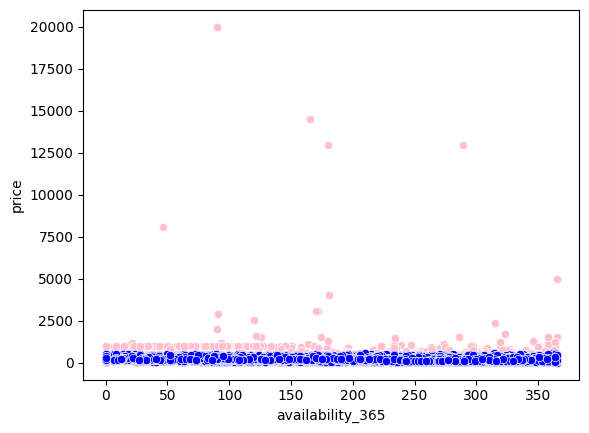

In [162]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='availability_365', y='price', color="pink", data=enthome_apt)
sns.scatterplot(x='availability_365', y='Predicciones2', color="blue", data=enthome_apt)

<Axes: xlabel='availability_365', ylabel='price'>

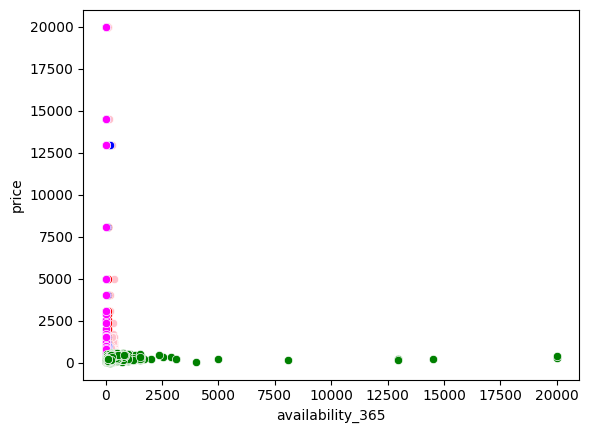

In [163]:
sns.scatterplot(x='availability_365', y='price', color="pink", data=enthome_apt)
sns.scatterplot(x='host_response_rate', y='price', color="red", data=enthome_apt)
sns.scatterplot(x='number_of_reviews', y='price', color="blue", data=enthome_apt)
sns.scatterplot(x='accommodates', y='price', color="magenta", data=enthome_apt)
sns.scatterplot(x='price', y='Predicciones2', color="green", data=enthome_apt)

In [164]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.026808403046470697
Coeficiente de correlación:  0.16373271831393596


## **3. “host_acceptance_rate vs number_of_reviews,review_scores_cleanliness,review_scores_communication ”**

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

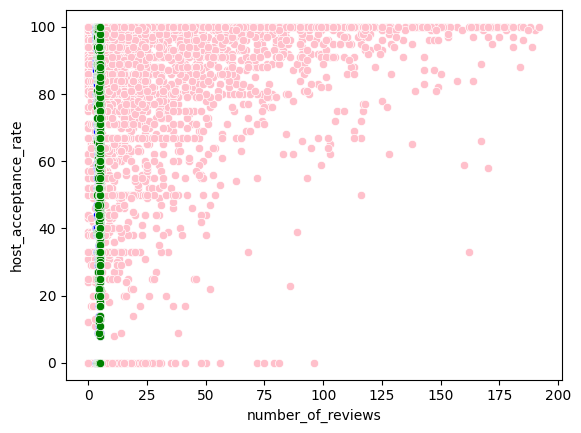

In [165]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="pink", data=enthome_apt)
sns.scatterplot(x='review_scores_cleanliness', y='host_acceptance_rate', color="blue", data=enthome_apt)
sns.scatterplot(x='review_scores_communication', y='host_acceptance_rate', color="green", data=enthome_apt)

In [166]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= enthome_apt[['number_of_reviews', 'review_scores_cleanliness','review_scores_communication']]
Var_Dep= enthome_apt['host_acceptance_rate']

In [167]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [168]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [169]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [170]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews', 'review_scores_cleanliness',
        'review_scores_communication'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 0.09518262, -2.91447145, -3.15514262]),
 'rank_': 3,
 'singular_': array([2343.58364848,   27.53781256,   16.27017781]),
 'intercept_': 112.13271056156853}

**Modelo matemático: y= 0.0001707x1 + 0.00886669x2 + -0.00298158x3 + 0.9435067016176633**

In [171]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.018210487663321562

In [172]:
#Predecimos los valores de total 
y_pred= model.predict(X=enthome_apt[['number_of_reviews', 'review_scores_cleanliness','review_scores_communication']])
y_pred

array([91.59637361, 84.20814241, 87.18375079, ..., 83.37791431,
       83.89697159, 86.75245018])

In [173]:
#Insertamos la columna de predicciones en el DataFrame
enthome_apt.insert(0, 'Predicciones3', y_pred)
enthome_apt.head()

,Predicciones3,Predicciones2,Predicciones,Unnamed: 0,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
2,91.596374,105.219915,93.138218,2,1212820,20230300000000.0,6620645.0,2.0,3.0,42.11284,...,Entire home/apt,1 bath,"[""Air conditioning"", ""Free parking on premises...",74.0,t,01/04/2023,10/06/2013,30/12/2022,HUTG-049542,f
4,84.208142,166.523902,89.394507,4,41342,20230300000000.0,180072.0,2.0,3.0,42.34655,...,Entire home/apt,1 bath,"[""Free parking on premises"", ""Refrigerator"", ""...",120.0,t,01/04/2023,14/07/2013,28/08/2021,HUTG-003688,f
5,87.183751,119.571924,88.554644,5,751997,20230300000000.0,3387407.0,12.0,12.0,41.91798,...,Entire home/apt,1 bath,"[""Air conditioning"", ""Pack ’n play/Travel crib...",105.0,t,01/04/2023,03/05/2016,26/02/2023,HUTG-016218,t
6,85.401990,113.153124,89.671399,6,752035,20230300000000.0,3387407.0,12.0,12.0,41.91801,...,Entire home/apt,1 bath,"[""Hair dryer"", ""Kitchen"", ""Iron"", ""Air conditi...",110.0,t,31/03/2023,02/07/2013,31/10/2021,HUTG-008974,f
7,83.377650,278.106422,90.899769,7,1215790,20230300000000.0,3149645.0,1.0,1.0,41.84984,...,Entire home/apt,2 baths,"[""Hair dryer"", ""Kitchen"", ""Iron"", ""Washer"", ""F...",60.0,t,01/04/2023,01/07/2013,18/02/2018,HUTG-017955,f


<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

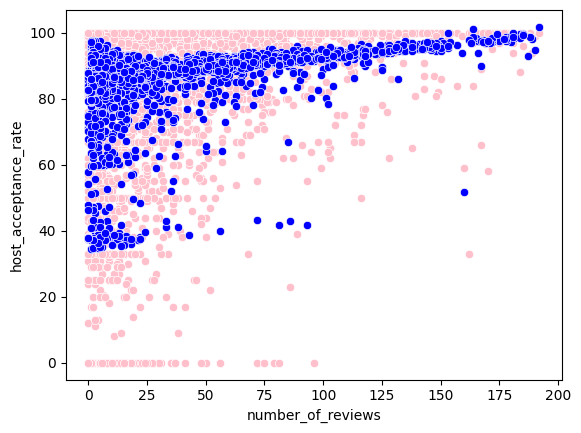

In [174]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="pink", data=enthome_apt)
sns.scatterplot(x='number_of_reviews', y='Predicciones', color="blue", data=enthome_apt)

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

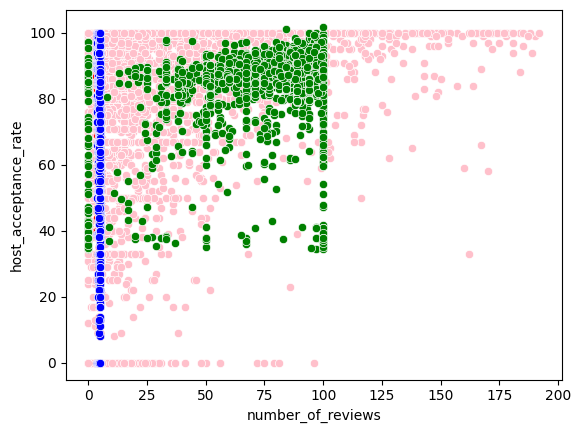

In [175]:
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="pink", data=enthome_apt)
sns.scatterplot(x='review_scores_cleanliness', y='host_acceptance_rate', color="red", data=enthome_apt)
sns.scatterplot(x='review_scores_communication', y='host_acceptance_rate', color="blue", data=enthome_apt)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones', color="green", data=enthome_apt)

In [176]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.018210487663321562
Coeficiente de correlación:  0.13494623990064178
